# MNIST 5: Etwas einfachere Daten

In [1]:
import numpy as np

from ki_kurs.mnist import MnistDataset
from ki_kurs.knn import TwoWayNetwork 

import matplotlib.pyplot as plt

### Ein einfacher Datensatz für die "Zahlen" 0 - 3

Der MNist-Datensatz ist als Demonstrationsobjekt für neuronale Netzwerke sehr wertvoll. Die Daten stammen "aus dem echten leben", sind umfangreich und sehr variantenreich. Unser einfaches Neuronales Netzwerk kommt trotzdem sehr schnell und einfach damit klar. 

Wir verstehen allerdings nicht wirkich, wie das Netzwerk die Daten verarbeitet. Unser "umgedrehtes" Netzwerk sollte eigentlich eine Art "idealer Zeichensatz" sein, doch den gibt es gar nicht. Es gibt zwar die Idealvorstellung einer geschriebenen Zahl, etwa einer 2, wie wir sie vielleicht einmal und der Gundschule gelernt haben, aber in der Realität kommen wir auch mit geschriebenen Zahlen klar, die weit davon abweichen. 

Wir wollen unser Netzwerk einmal ausschließlich mit "perfekt geschriebenen" Zahlen füttern. Dafür haben wir aber elider keine Daten. Wir behelfen uns mit einem selbst gebauten Ersatz. Wir haben mit einem texteditor eine CSV-Datei erstellt und die Ziffern 0, 1, 2, 3 mit neuen Symbolen dargestellt, die in ein 5x5-Raster passen. Das sieht so aus:

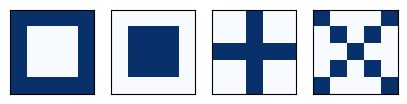

In [2]:
size, values = 5, 4
simple_data = MnistDataset("daten/simple4.csv",size,size)
fig = plt.figure(figsize=(5,5))

simple_data.plot_list(1,values)
plt.show()      

Wir haben alle unsere Klassen so geschrieben, dass sie auch mit diesen Zeichen umgehen können! Dies gilt auch für das Netzwerk, das wir jetzt tranieren:

In [3]:
network = TwoWayNetwork(size*size,10,values)

scale = lambda record: (np.asfarray(record[1:]) / 255.0 * 0.99) + 0.01

for epoch in range(1000):
    for record in simple_data:
        # Skalierung
        input = scale(record)
    
        # Das gewuenschte Ergebnis
        targets = np.zeros(values) + 0.01
        targets[int(record[0])] = 0.99
        
        network.train(input, targets)
        pass

Wir fragen jetzt mal alle gelernten Werte ab:

In [4]:
for d in simple_data:
    output = network.query(scale(d))
    print(output)

[0.95852382 0.02249999 0.03584782 0.03095002]
[0.024163   0.95984004 0.03398622 0.03604607]
[0.02764557 0.03158644 0.9557638  0.00548805]
[0.03481668 0.03162295 0.02673373 0.95696265]


Wie zu erwarten, erhalten wir eine Performace von 100 %, d. h. alle Werte werden richtig erkannt.

Wie sehen nun für das Netzwerk die idealen Ziffern-Symbole aus?

In [5]:
def create_output(n):
    output = np.zeros(values) + 0.01
    output[n] = 0.99
    return output;

def image_from_output(network,n):
    return network.reverse(create_output(n))

def show_image(data,rows,cols):
    plt.imshow(data.reshape(rows,cols), cmap='Greys', interpolation='None')


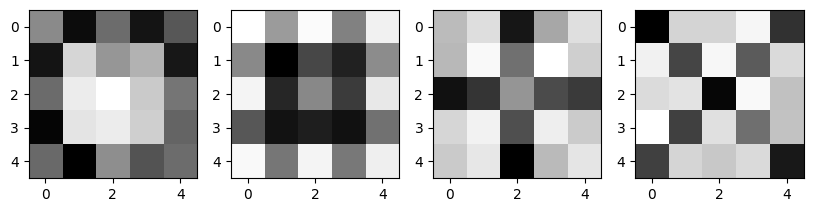

In [6]:
plt.figure(figsize=(10,10))
for col,v in enumerate(range(values)): 
    plt.subplot(1,values,col+1)    
    input = image_from_output(network,v)
    show_image(input,size,size) 

plt.show()

Die Ideal-Bilder entsprechen schon eher unseren Vorstellungen. Sie spiegeln vor allem die Symmetrie der Daten wieder. Sie weichen trotzdem von den vier ursprünglichen, künstlich erzeugten Werten ab.